# Tarea 3 - Máquinas de Aprendizaje
## Métodos No-Lineales
### Integrantes: Gabriel Jara, Daniel San Martín

## 1. Small Circle inside Large Circle

El objetivo de esta sección es experimentar con algunos modelos no-lineales sobre un problema de juguete
generado para visualizar algoritmos de *clustering*. Se trata de un problema de clasificación a todas luces
linealmente inseparable, en el sentido que, si denotamos por $\textbf{x}\in\mathbb{R}^2$ un patrón de entrada y por $y\in\{0, 1\}$ su correspondiente etiqueta, no existen $\textbf{w}\in\mathbb{R}^2$ , $b\in\mathbb{R}$ tal que $y(\textbf{w}^T\textbf{x} + b) \geq \rho > 0$. El problema nos permite
hacer un recorrido rápido por las grandes ideas en la búsqueda de la no-linealidad.

<img src="img/1.png">
<center>Figura 1: Distribución deseada para la actividad 1. Los 2 colores representan 2 clases distintas.</center>

(a) Escriba una función que genere (aleatoriamente) n datos etiquetados de la forma $\{(\textbf{x}_1, y_1), ..., (\textbf{x}_n, y_n)\}$, $\textbf{x}_i \in \mathbb{R}^2, ~ y_i \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la Fig. 1$^3$. Utilice esta función para crear $1000$ datos de entrenamiento y $1000$ datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un $5\%$ de ruido al dataset, generando $\textbf{x}$’s cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente (como lo muestra la Fig. 1).

$^3$Puede generar datos aleatorios distribuidos de manera circular para luego etiquetar aquellos ubicados en el cı́rculo interior como $1$ y en el cı́rculo exterior $0$.

In [ ]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
    np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
    np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=42)
    return X_train, y_train, X_test, y_test

Para lo que sigue de la actividad utilice la siguiente función para graficar las fronteras de clasificación
en base a la probabilidad que asigna cada algoritmo a la clase de un ejemplo.

In [ ]:
import matplotlib.pyplot as plt

def plot_classifier(clf, X_train, Y_train, X_test, Y_test, model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')        
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

(b) Demuestre <u>experimentalmente</u> que una red neuronal artificial correspondiente a $1$ sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño
del modelo en el problema con cada cambio efectuado. Adapte también la función ```plot_classifier``` para que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

In [ ]:
X_train, Y_train, X_test, Y_test = do_circles()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h = 1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

In [ ]:
# Plot training loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.plot(hist.epoch, hist.history['loss']) 
plt.title("Training Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
# Plot training loss
%matplotlib inline
import matplotlib.pyplot as plt

plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

In [ ]:
print "Testing Accuracy: " + str(test_acc)

La Red neuronal de un único nodo no ha logrado generar una frontera que separe efectvamente ambas clases. Se observa que la función de pérdida, en este caso Entropia Cruzada Binaria, alcanza un mínimo de entrenamiento por sobre 0.56. La Exactitud (Accuracy) de clasificación sobre el set de testeo es de casi 0.7, o sea un 70% de las observaciones logra ser bien clasificadas. 

Se repite el experimento utizando Mínimos Cuadrados como función de pérdida, para comprobar si mejora el anterior resultado. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h = 1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='mean_squared_error', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

In [ ]:
# Plot training loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.plot(hist.epoch, hist.history['loss']) 
plt.title("Training Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
# Plot training loss
%matplotlib inline
import matplotlib.pyplot as plt

plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

In [ ]:
print "Testing Accuracy: " + str(test_acc)

Mínimos Cuadrados no mejora significativamente el resultado anterior. La función de perdida disminuye su valor, pero no es comparable dado que es una métrica diferente. La efectividad del clasificador sobre el set de testeo es similar a la anterior. Se observa que el problema del clasificador no está en la función de pérdida, sino en su limitada arquitectura que sólo le permite trazar fronteras de clasificación lineales, siendo el problema no linealmente separable.  

(c) Demuestre <u>experimentalmente</u> que una red neuronal artificial con $1$ capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de neuronas $N_h$ en la red entre $2$ y $32$ en potencias de $2$, graficando el error de entrenamiento y pruebas como función de $N_h$. Describa y explique lo que observa. Utilice la función plot classifier, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

Se prueba en primer lugar aumentar el  número de nodos en la capa oculta de 1 a 2. 

In [ ]:
n_h = 2
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

In [ ]:
# Plot training loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.plot(hist.epoch, hist.history['loss']) 
plt.title("Training Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

In [ ]:
print "Testing Accuracy: " + str(test_acc)

Se aprecia una mejora significativa respecto a la situación anterior, puesto que la efectividad del modelo se incrementa a sobre 0.85. La gráfica de la frontera de clasificación permite apreciar que al incorporar un nodo adicional la frontera puede representar una clasificación lineal en dos tramos, lo que explica la mejora. 

In [ ]:
n_h = 4
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]

In [ ]:
# Plot training loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.plot(hist.epoch, hist.history['loss']) 
plt.title("Training Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
plot_classifier(model, X_train, Y_train, X_test, Y_test, 'ann')

In [ ]:
print "Testing Accuracy: " + str(test_acc)

Se constata que con cuatro nodos en la capa oculta, la Red Neuronal logra efectivamente generar una frontera de clasificación que separa ambas clases. En consecuencia, la función de perdida logra decaer a cero, y la efectividad del predictor sobre la muestra de testeo llega a uno, denotando que todas las observaciones fueron bien clasificadas. 

Seguir aumentando los nodos en la capa oculta permitirá suavizar la frontera de clasificación, pero ya no podrá mejorar la clasificación, puesto que ya es 100% correcta. 

(d) Demuestre <u>experimentalmente</u> que stump (árbol de clasificación de $1$ nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea
convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función ```plot_classifier``` para que represente gráficamente la solución encontrada por el árbol. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Se aprecia que un árbol con sólo un nivel de profundidad no puede establecer una frontera de clasificación efectiva en este caso. El clasificador es incluso más limitado que la Red Neuronal con un nodo, al quedar limitado a trazados ortogonales a una de las dimensiones de las variables independientes. 

Se prueba a continuación cambiar el criterio de clasificación, originalmete coeficiente de Gino, para probar con entropía y confirmar si esto permite mejorar los resultados. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree

clf=Tree(criterion='entropy', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Como era predecible, el resultado no mejora con el cambio de criterio. Nuevamente, el problema está en la limitada arquitectura del modelo, que no permite resolver un problema no linealmente separable. 

(e) Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera, pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de niveles admitidos en el árbol $N_t$ entre $2$ y $20$, graficando el error de entrenamiento y pruebas como función de $N_t$. Describa y explique lo que observa. Utilice la función ```plot_classifier```, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

In [ ]:
n_t=2
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Al configurar el árbol con dos niveles, inmediatamente se percibe una mejora significativa, gracias a que ahora puede establecer una fronteras de clasificación con dos secciones, las que tendrán que ser paralelos u ortogonales. En este caso se aprecia de a gráfica que resultaron paralelas. 

In [ ]:
n_t=3
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Un tercer nivel permitió que una nueva mejora, ahora la frontera tiene tres segmentos. 

In [ ]:
n_t=4
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Con cuatro niveles se logra una fronetera de clasificación adecuada a la naturaleza del problema, alcanzando en este caso una efectividad en la clasificación del set de testeo de 0.994. 

In [ ]:
n_t=5
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Agregar un quinto nivel no mejoró la clasificación, puesto que si bien el árbol mejora algo en el set de entrenamiento, empeora su efectividad en el set de testeo, lo que evidencia sobreajuste. 

In [ ]:
n_t=6
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

De 5 niveles en adelante el árbol resultante ya no varía, puesto que los niveles adicionales no permiten mejorar la clasificación durante el entrenamiento. 

Se probará a continuación nuevamente el modelo de árbol con 4 niveles, pero esta vez con entropia como criterio de clasificación, para ver si se mejora los resultados anteriores. 

In [ ]:
n_t=4
clf=Tree(criterion='entropy', splitter='best', random_state=0, max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

En este caso el clasificador resultante con entropía fue levemente mejor que el obtenido con gini, de acuerdo a la precisión con que clasificó el set de testeo. 

(f) Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide experimentar otra alternativa. Para ello deberá realizar una proyección de los datos a un nuevo espacio dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano ([2]) para extraer sus vectores con dimensión infinita de mayor varianza.

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

(g) Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.

In [ ]:
clf=Tree(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(Xkpca_train, Y_train)
acc_test = clf.score(Xkpca_test, Y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf, Xkpca_train, Y_train, Xkpca_test,Y_test,'tree')

Luego de realizada la descomposición con PCA, el problema pasa a ser linealmente separable. Utilizando un árbol de decisión con un nivel de profundidad, se pudo sin problema generar un clasificador que presenta 100% de éxito en la clasificación sobre el set de testeo. 

## 2. Bike Sharing: Predicción de Demanda Horaria

En esta sección simularemos nuestra participación en el desafı́o Bike Sharing Demand de Kaggle [3]. El objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington, D.C., en función de la hora del dı́a y otras variables descritas en la tabla 1. En principio, y como muestra la figura, la función es altamente no lineal y no determinista como función de la hora del dı́a. Su objetivo será entrenar un modelo para obtener un puntaje correspondiente al top-100 del "leaderboard" final, es decir superior o igual a $0.37748$. La función utilizada para evaluar este concurso Kaggle se proporciona en la siguiente ecuación:

\begin{equation}
    E_{bikes}(\textbf{y},\hat{\textbf{y}}) = \frac1n \sum_i (\ln(y_i + 1) - \ln(\hat{y}_i + 1))^2,
\end{equation}

donde $\textbf{y},\hat{\textbf{y}} \in \mathbb{R}^n$ denotan los vectores de observaciones y predicciones respectivamente. Como el dataset de pruebas original no está disponible se fabricará uno, correspondiente al $20\%$ de los datos de entrenamiento. Además, se pondrá a su disposición un subconjunto independiente de datos con propósitos de validación. Usted podrá descargar los archivos correspondientes al subconjunto de entrenamiento y pruebas a utilizar ejecutando los siguientes comandos:

```wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_train.csv```

```wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_val.csv```

```wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_test.csv```

<img src="img/2.png">
<center>Tabla 1: Atributos para el Problema 2 (*Bike Sharing*).</center>

(a) Cargue los datos de entrenamiento y pruebas como dataframes de *pandas*. Describa las variables invo-
lucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distintos y, si
corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación de
pre-procesamiento de datos será obtener la hora del dı́a desde el campo fecha (que en este momento es
de tipo string), creando una nueva columna denominada *hour* y de tipo *int*. Para hacer esta operación
se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo
la separación original.

In [ ]:
import pandas as pd
import numpy as np

dftrain = pd.read_csv('data/bike_sharing_train.csv')
dfval = pd.read_csv('data/bike_sharing_val.csv')
dftest = pd.read_csv('data/bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])

df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

print '\nSummary - dataframe completo:\n'
print df.describe()

(b) Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. Con este
fin, construya una matriz $\textbf{X}_{train}$ de forma $n_{train} \times d_1$ que contenga los datos de entrenamiento en sus filas, seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente además, la función de evaluación que hemos definido anteriormente para este problema. Evalúe el árbol de regresión ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un gráfico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo con puntaje del orden de $0.59$, lo que lo dejará más o menos en la posición $2140$ de la competencia.

In [ ]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VALIDATION =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test
print "Max Depth: "+ str(model.tree_.max_depth)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Y_test,Y_pred_test,'.')
plt.show()

(c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podrı́a intentar limitar la profundidad del árbol (¿Por qué esto debiese ayudar?). Naturalmente, está absolutamente prohibido tomar este tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento. Con estas modificaciones debiese poder mejorar su ranking en unas $300$ posiciones.

In [ ]:
best_depth = 0
kagg_validated = 1

for d in range(1,29):
    model = Tree(random_state=0, max_depth=d)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    print "KAGG EVAL VAL =%f"%kagg_val
    print "Max Depth: "+ str(model.tree_.max_depth)
    print ''
    if kagg_val < kagg_validated:
        best_depth = d
        kagg_validated = kagg_val
print ''
print 'BEST TREE MODEL:'
print "KAGG EVAL VAL =%f"%kagg_validated
print "Max Depth: "+ str(best_depth)
    


(d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representa-
ción utilizada para aprender desde los datos. Por ejemplo, los histogramas que construyó en el punto
(a) ası́ como la forma especial de la función de evaluación, sugieren una cierta transformación de la
variable respuesta. Podrı́a intentar también normalizando los datos o normalizando la respuesta. Otra
opción es intentar rescatar algo más acerca de la fecha (anteriormente sólo se extrajo la hora), como por
ejemplo el año o el dı́a de la semana (’lunes’,’martes’, etc) que corresponde. Sea creativo, este paso le
debiese reportar un salto de calidad muy significativo. Una observación importante es que si hace una
transformación a la variable respuesta (por ejemplo raı́z cuadrada), debe invertir esta transformación
antes de evaluar el desempeño con eval bikemodel (por ejemplo, elevar al cuadrado si tomó raı́z cua-
drada). Con modificaciones de este tipo, podrı́a mejorar su ranking en unas $1000$ posiciones, entrando
ya al top-$1000$ con un score del orden de $0.45$.

In [ ]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])

Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'year']]

print '\nSummary - dataframe completo:\n'
print df.describe()

In [ ]:
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

In [ ]:
best_depth = 0
kagg_validated = 1

for d in range(1,29):
    model = Tree(random_state=0, max_depth=d)
    model.fit(X_train,Y_train)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    print "KAGG EVAL VAL =%f"%kagg_val
    print "Max Depth: "+ str(model.tree_.max_depth)
    print ''
    if kagg_val < kagg_validated:
        best_depth = d
        kagg_validated = kagg_val
print ''
print 'BEST TREE MODEL:'
print "KAGG EVAL VAL =%f"%kagg_validated
print "Max Depth: "+ str(best_depth)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler().fit(X_train)
X_train_sc = scaler_x.transform(X_train)

model = Tree(random_state=0, max_depth=11)
model.fit(X_train_sc,Y_train)
Y_pred_val = model.predict(scaler_x.transform(X_val))
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val
print "Max Depth: "+ str(model.tree_.max_depth)
print ''

In [ ]:
X_train_ln = np.log(X_train+1)**2
X_val_ln = np.log(X_val+1)**2

model = Tree(random_state=0, max_depth=11)
model.fit(X_train_ln,Y_train)
Y_pred_val = model.predict(X_val_ln)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val
print "Max Depth: "+ str(model.tree_.max_depth)
print ''

(e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM serı́a
aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables
categóricas en un modo apropiado - por ejemplo como vector binario con un 1 en la posición del
valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables.
Usando parámetros por defecto para la SVM debiese obtener un score del orden de $0.344$, quedando
definitivamente en el top-$10$ de la competencia.

In [ ]:
import pandas as pd
import numpy as np

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

dftrain = pd.read_csv('data/bike_sharing_train.csv')
dfval = pd.read_csv('data/bike_sharing_val.csv')
dftest = pd.read_csv('data/bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)

df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp',
'humidity','windspeed','hour','cday', 'year']]

Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday', 'year'])

Ydf=df.ix[:,'count']

print '\nSummary - Xdataframe dummies:\n'
print Xdf.describe()

In [ ]:
Xdf = Xdf.drop('season_1', axis=1)
Xdf = Xdf.drop('weather_1', 1)
Xdf = Xdf.drop('hour_1', 1)
Xdf = Xdf.drop('cday_1', 1)
Xdf = Xdf.drop('year_2011', 1)

print '\nSummary - Xdataframe dummies:\n'
print Xdf.describe()


In [ ]:
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)



In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)

kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val
print ''

(f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la
máquina ($C$, $\epsilon$ o la misma función de kernel). Naturalmente, está absolutamente prohibido tomar este
tipo de decisiones de diseño mirando el resultado de pruebas. Debe realizar estas elecciones evaluan-
do sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento.

In [ ]:
model = SVR(kernel='sigmoid', C=1,epsilon=0.01)

model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val

In [ ]:
C_range = 10. ** np.arange(-5, 3)
epsilon_range = 10. ** np.arange(-8, 1)

best_C = "none"
best_epsilon = "none"
kagg_validated = 2

for c in C_range:
    for e in epsilon_range:
        model = SVR(C=c,epsilon=e)
        model.fit(X_train,Y_train)
        Y_pred_val = model.predict(X_val)
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)
        print "C = " +str(c)+ " epsilon = " + str(e)
        print "KAGG EVAL VAL =%f"%kagg_val
        print ""
        if kagg_val < kagg_validated:
            best_C = c
            best_epsilon = e
            kagg_validated = kagg_val

print ""
print "Best C = " +str(best_C)+ " Best epsilon = " + str(best_epsilon)
print "KAGG EVAL VAL =%f"%kagg_val


(g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros estructurales del árbol de clasificación y la SVM usando validación cruzada. El código de ejemplo para esto ha sido proporcionado en las tareas $1$ y $2$, pero se adjunta de nuevo a continuación

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
        model = #define your model
        model.fit(Xm[train], ym[train])
        yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
        mse_cv += score_fold
mse_cv = mse_cv / 10

(h) Evalúe el efecto de utilizar un ensamblado de $2$ máquinas de aprendizaje para predecir la demanda
total de bicicletas. Un modelo se especializará en la predicción de la demanda de bicicletas de parte
de usuarios registrados y otra en la predicción de la demanda de usuarios casuales. Hay razones claras
para pensar que los patrones son distintos.

In [ ]:
Ydf=df.ix[:,'count'] #demanda total
Ydf=df.ix[:,'registered'] #demanda registrada
Ydf=df.ix[:,'casual'] #demanda casual

(i) Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir
la demanda total de bicicletas. Puede experimentar con una sola técnica (e.g. Random Forest), discuta
la evolución a medida que aumenta el número de máquinas.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

## 3. Calidad de un Vino

Dentro de las variedades del vino, existen distintas calidades de este, donde algunos gustan mas a algunas personas que otras, esto depende de la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios el estimar cuál es la calidad del vino en base a la apreciación de la gente es una tarea bastante difı́cil.
Para esta actividad se trabajará con dos datasets asociados a variantes tinto y blanco del vino Portugués "Vinho Verde" [4]. Debido a temas privados solo se cuenta atributos fisioquímicos asociados a un vino en particular, los cuales corresponden a $11$ atributos numéricos descritos en el siguiente link. Este problema puede ser abordado como clasificación de $11$ clases o de regresión, ya que el atributo a estimar, la calidad quality, es un valor entero entre $0$ y $10$

(a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [104]:
import pandas as pd
df_red = pd.read_csv("data/winequality-red.csv",sep=";")
df_red['is_red'] = 1 
df_white = pd.read_csv("data/winequality-white.csv",sep=";")
df_white['is_red'] = 0
df = pd.concat([df_red,df_white], axis=0)
#genere atributo ’tipo’

In [105]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


(b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de calidad o no, es decir, utilice las distintas características fisioquı́micas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a $5$ un vino de buena calidad. El conjunto de pruebas ($25 \%$) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

In [106]:
import numpy as np

df_red = pd.read_csv("data/winequality-red.csv",sep=";")
df_red['is_red'] = 1 
df_red_train = df_red[:((len(df_red)*3/4))]
df_red_test = df_red[(len(df_red)*3/4):]

df_white = pd.read_csv("data/winequality-white.csv",sep=";")
df_white['is_red'] = 0
df_white_train = df_white[:(len(df_white)*3/4)]
df_white_test = df_white[(len(df_white)*3/4):]

Xdf_train = pd.concat([df_red_train,df_white_train], axis=0)
Xdf_test = pd.concat([df_red_test,df_white_test], axis=0)
Ydf_train = [1 if q>5 else 0 for q in Xdf_train.quality]
Ydf_test = [1 if q>5 else 0 for q in Xdf_test.quality]

Xdf_train = Xdf_train.drop('quality', 1)
Xdf_test = Xdf_test.drop('quality', 1)

features = []
features.append(Xdf_train.columns)

Xdf_train = np.asarray(Xdf_train)
Xdf_test = np.asarray(Xdf_test)
Ydf_train = np.asarray(Ydf_train)
Ydf_test = np.asarray(Ydf_test)

(c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica *F1-score* [5] sobre el conjunto de entrenamiento y de pruebas.

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier(random_state=0)
model.fit(Xdf_train,Ydf_train)


features.append(model.feature_importances_)
features = pd.DataFrame(features)

print features
print ''
print "Max Depth: "+ str(model.tree_.max_depth)
print 'Training Accuracy: '+ str(model.score(Xdf_train,Ydf_train))
print 'Testing Accuracy: '+ str (model.score(Xdf_test,Ydf_test))

Y_pred = model.predict(Xdf_test)

print 'Testing F1-score: '+ str (f1_score(Y_pred,Ydf_test))


              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1      0.0633019          0.118485    0.0633004       0.0695524  0.0647844   

                    5                     6          7          8          9   \
0  free sulfur dioxide  total sulfur dioxide    density         pH  sulphates   
1            0.0784906             0.0916801  0.0665311  0.0812369  0.0789627   

         10          11  
0   alcohol      is_red  
1  0.218036  0.00563873  

Max Depth: 26
Training Accuracy: 1.0
Testing Accuracy: 0.710769230769
Testing F1-score: 0.778301886792


Se entrena en primera instancia un árbol de clasificación sin profundidad máxima, lo que podría implicar sobreajuste. Se observa que la variable más significativa para el árbol de clasificación fue la graduación de alcohol. 

A continuación se busca la profundidad óptima con validacion cruzada. 

In [108]:
from sklearn.model_selection import KFold

d_range = range(1,27)
best_d = "none"
best_f1 = 0

for d in d_range:
    model = DecisionTreeClassifier(random_state=0, max_depth=d)
    kf = KFold(n_splits=10)
    f1_cv = 0
    for train, val in kf.split(Xdf_train):
        model.fit(Xdf_train[train], Ydf_train[train])
        yhat_val = model.predict(Xdf_train[val])
        ytrue_val = Ydf_train[val]
        f1_cv += f1_score(yhat_val,ytrue_val)
    f1_cv = f1_cv / 10
    if f1_cv > best_f1:
        best_f1 = f1_cv
        best_d = d
    print ''
    print 'Max Depth: ' + str(d)
    print "Depth: "+ str(model.tree_.max_depth)
    print 'Validation F1-score: '+ str (f1_cv)




Max Depth: 1
Depth: 1
Validation F1-score: 0.707074976682

Max Depth: 2
Depth: 2
Validation F1-score: 0.764488163496

Max Depth: 3
Depth: 3
Validation F1-score: 0.771113022221

Max Depth: 4
Depth: 4
Validation F1-score: 0.759680039091

Max Depth: 5
Depth: 5
Validation F1-score: 0.772134295425

Max Depth: 6
Depth: 6
Validation F1-score: 0.761870714809

Max Depth: 7
Depth: 7
Validation F1-score: 0.756169296029

Max Depth: 8
Depth: 8
Validation F1-score: 0.763748143322

Max Depth: 9
Depth: 9
Validation F1-score: 0.751243565434

Max Depth: 10
Depth: 10
Validation F1-score: 0.753559849629

Max Depth: 11
Depth: 11
Validation F1-score: 0.745694646683

Max Depth: 12
Depth: 12
Validation F1-score: 0.741061613068

Max Depth: 13
Depth: 13
Validation F1-score: 0.726983903444

Max Depth: 14
Depth: 14
Validation F1-score: 0.730319345808

Max Depth: 15
Depth: 15
Validation F1-score: 0.717852163933

Max Depth: 16
Depth: 16
Validation F1-score: 0.725695099077

Max Depth: 17
Depth: 17
Validation F1-sco

El árbol de clasificación de mejor desempeño, según el F1-score, fue con 5 niveles de profundidad. 

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier(random_state=0, max_depth=best_d)
model.fit(Xdf_train,Ydf_train)

print ''
print "Max Depth: "+ str(model.tree_.max_depth)
print 'Training Accuracy: '+ str(model.score(Xdf_train,Ydf_train))
print 'Testing Accuracy: '+ str (model.score(Xdf_test,Ydf_test))

Y_pred = model.predict(Xdf_test)

print 'Testing F1-score: '+ str (f1_score(Y_pred,Ydf_test))



Max Depth: 5
Training Accuracy: 0.754720853859
Testing Accuracy: 0.756307692308
Testing F1-score: 0.820814479638


(d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de *Random Forest*. Varı́e la cantidad de árboles de decisión utilizados en el ensamblado (```n_estimators```), realice un gráfico resumen del *F1-score* de entrenamiento y de pruebas en función de este hiper-parámetro.

In [110]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, max_depth=None,n_jobs=-1)
model.fit(Xdf_train,Ydf_train)
print ''
print 'Training Accuracy: '+ str(model.score(Xdf_train,Ydf_train))
print 'Testing Accuracy: '+ str (model.score(Xdf_test,Ydf_test))
Y_pred_train = model.predict(Xdf_train)
Y_pred_test = model.predict(Xdf_test)
print 'Training F1-score'+ str(f1_score(Y_pred_train,Ydf_train))
print 'Testing F1-score: '+ str (f1_score(Y_pred_test,Ydf_test))


Training Accuracy: 0.991379310345
Testing Accuracy: 0.753846153846
Training F1-score0.993123772102
Testing F1-score: 0.814471243043


In [111]:
n_range = range(0,8)

f1_scores_train = []
f1_scores_test = []
NN = []
best_n = "none"
best_f1 = 0

for i in n_range:
    n = 2**i
    model = RandomForestClassifier(n_estimators=n, max_depth=None,n_jobs=-1)
    model.fit(Xdf_train,Ydf_train)
    Y_pred_train = model.predict(Xdf_train)
    Y_pred_test = model.predict(Xdf_test)
    f1_score_train = f1_score(Y_pred_train,Ydf_train)
    f1_score_test = f1_score(Y_pred_test,Ydf_test)
    f1_scores_train.append(f1_score_train)
    f1_test = f1_score_test
    f1_scores_test.append(f1_test)
    NN.append(n)
    if f1_test > best_f1:
        best_f1 = f1_test
        best_n = 2**i
print 'Number of Trees: ' + str(best_n)
print 'F1-score: ' + str(best_f1)
   

Number of Trees: 32
F1-score: 0.839550561798


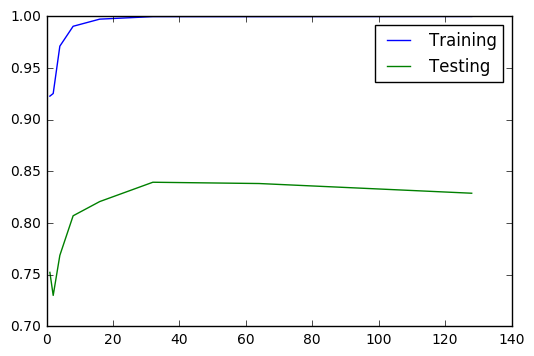

In [112]:
import matplotlib.pyplot as plt


plt.plot(NN, f1_scores_train )
plt.plot(NN, f1_scores_test )

plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

El RandomTree de mejor desempeño, según F1-score en la muestra de testeo, tuvo 32 clasificadores, obteniendo sobre 0.839. 

(e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de *AdaBoost*. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (```n_estimators```), realice un gráfico resumen del *F1-score* de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier as Tree

model = AdaBoostClassifier(base_estimator=Tree(max_depth=5), n_estimators=10)
model.fit(Xdf_train,Ydf_train)
print ''
print 'Training Accuracy: '+ str(model.score(Xdf_train,Ydf_train))
print 'Testing Accuracy: '+ str (model.score(Xdf_test,Ydf_test))
Y_pred_train = model.predict(Xdf_train)
Y_pred_test = model.predict(Xdf_test)
print 'Training F1-score'+ str(f1_score(Y_pred_train,Ydf_train))
print 'Testing F1-score: '+ str (f1_score(Y_pred_test,Ydf_test))


Training Accuracy: 0.846880131363
Testing Accuracy: 0.742153846154
Training F1-score0.880218368658
Testing F1-score: 0.8089375285


In [114]:
n_range = range(0,8)

f1_scores_train = []
f1_scores_test = []
NN = []
best_n = "none"
best_f1 = 0

for i in n_range:
    n = 2**i
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=5), n_estimators=n)
    model.fit(Xdf_train,Ydf_train)
    Y_pred_train = model.predict(Xdf_train)
    Y_pred_test = model.predict(Xdf_test)
    f1_score_train = f1_score(Y_pred_train,Ydf_train)
    f1_score_test = f1_score(Y_pred_test,Ydf_test)
    f1_scores_train.append(f1_score_train)
    f1_scores_test.append(f1_score_test)
    f1_test = f1_score_test
    NN.append(n)
    if f1_test > best_f1:
        best_f1 = f1_test
        best_n = 2**i
print 'Number of Trees: ' + str(best_n)
print 'F1-score: ' + str(best_f1)   

Number of Trees: 4
F1-score: 0.824751580849


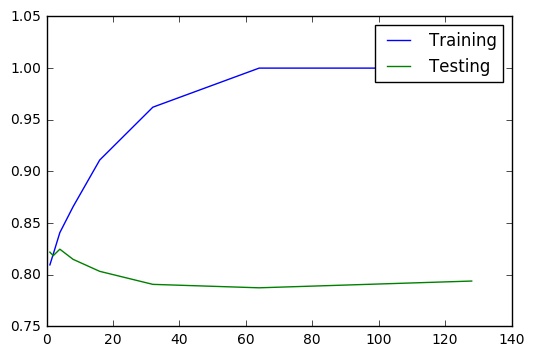

In [115]:
import matplotlib.pyplot as plt


plt.plot(NN, f1_scores_train )
plt.plot(NN, f1_scores_test )

plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

El Adaboost con mejor desempeño, con 0.824 en F1-score sobre la muestra de testeo, requirió 4 clasificadores. 

(f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-score* obtenido por los algoritmos anteriores. Compare y analice estas $4$ maneras de resolver el problema definido en b).

Se entrenará una Red Neuronal con dos capas ocultas y Dropout. El número de nodos por capa, proporción de Dropout, función de activación de nodos ocultos, optimizador y tamaño e bash, se elegiran por validación cruzada.  

from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()
Xdf_train = scalerX.fit_transform(Xdf_train)
scalerX = StandardScaler()
Xdf_test = scalerX.fit_transform(Xdf_test)


In [14]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam

n_range = range(1,16)
dr_range = [0, 0.2, 0.4, 0.6]
best_n = "none"
best_dr = "none"
best_f1 = 0

for n in n_range:
    for dr in dr_range:
        model = Sequential()
        model.add(Dense(n, input_dim=Xdf_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(n, init='uniform', activation='sigmoid'))
        model.add(Dropout(dr))
        model.add(Dense(1, activation='sigmoid'))
        opt = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(Xdf_train, Ydf_train, epochs=50, batch_size=100, verbose=0)
        nv = 10
        kf = KFold(n_splits=nv)
        f1_cv = 0
        for train, val in kf.split(Xdf_train):
            model.fit(Xdf_train[train], Ydf_train[train])
            yhat_val = model.predict(Xdf_train[val])
            yhat_val = [round(x[0]) for x in yhat_val]
            ytrue_val = Ydf_train[val]
            f1_cv += f1_score(yhat_val,ytrue_val)
        f1_cv = f1_cv / nv
        if f1_cv > best_f1:
            best_f1 = f1_cv
            best_n = n
            best_dr = dr
        print 'Nodes: ' + str(n)
        print 'Dropout: ' + str(dr)
        print 'F1 val: ' + str(f1_cv)
        print ''
print 'Optimizer: SGD'
print 'Hiden: Sigmoid'
print 'Best numbers of nodes: ' + str(best_n)
print 'Best dropout: ' + str(best_dr)
print 'Validation F1-score: ' + str(best_f1)
print ''


Using TensorFlow backend.
/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 29us/step - loss: 0.6504 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 32us/step - loss: 0.6522 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6610 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6605 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6610 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6638 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6551 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6566 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6644 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6692 - acc: 0.6103
Nodes: 1
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 32us/step - loss: 0.6500 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 35us/step - loss: 0.6518 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6605 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6599 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6603 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6628 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6542 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6555 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6632 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6676 - acc: 0.6103
Nodes: 2
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 28us/step - loss: 0.6500 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 29us/step - loss: 0.6518 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6606 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 28us/step - loss: 0.6601 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6605 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 29us/step - loss: 0.6631 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 29us/step - loss: 0.6547 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 28us/step - loss: 0.6560 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 29us/step - loss: 0.6637 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6682 - acc: 0.6103
Nodes: 3
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 30us/step - loss: 0.6496 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 32us/step - loss: 0.6515 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6602 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6596 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6598 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6624 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6536 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6548 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6623 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 30us/step - loss: 0.6666 - acc: 0.6103
Nodes: 4
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 30us/step - loss: 0.6501 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 31us/step - loss: 0.6519 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6608 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6603 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6607 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6634 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6548 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6562 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6639 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6685 - acc: 0.6103
Nodes: 5
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 31us/step - loss: 0.6477 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 34us/step - loss: 0.6492 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6575 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6563 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 35us/step - loss: 0.6559 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6578 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6478 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6483 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 31us/step - loss: 0.6552 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6584 - acc: 0.6103
Nodes: 6
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 33us/step - loss: 0.6496 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 33us/step - loss: 0.6514 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6602 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6595 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 33us/step - loss: 0.6598 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6624 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6536 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 32us/step - loss: 0.6549 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6623 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 35us/step - loss: 0.6667 - acc: 0.6103
Nodes: 7
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 57us/step - loss: 0.6503 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 49us/step - loss: 0.6521 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 60us/step - loss: 0.6611 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 66us/step - loss: 0.6606 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6610 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6636 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.6551 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6566 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6643 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.6687 - acc: 0.6103
Nodes: 8
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 34us/step - loss: 0.6473 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 33us/step - loss: 0.6488 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 36us/step - loss: 0.6571 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 35us/step - loss: 0.6559 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6555 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 35us/step - loss: 0.6574 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 34us/step - loss: 0.6479 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6484 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 36us/step - loss: 0.6551 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 36us/step - loss: 0.6586 - acc: 0.6103
Nodes: 9
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 38us/step - loss: 0.6497 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 36us/step - loss: 0.6515 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6604 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6598 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6600 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6625 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6538 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6553 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 36us/step - loss: 0.6628 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 35us/step - loss: 0.6672 - acc: 0.6103
Nodes: 10
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 36us/step - loss: 0.6472 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 35us/step - loss: 0.6486 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6565 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6553 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6545 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6560 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 36us/step - loss: 0.6456 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6458 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6514 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6540 - acc: 0.6103
Nodes: 11
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 37us/step - loss: 0.6469 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 37us/step - loss: 0.6483 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6562 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 37us/step - loss: 0.6550 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6544 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6561 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6458 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6462 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6523 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6553 - acc: 0.6103
Nodes: 12
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 41us/step - loss: 0.6472 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 39us/step - loss: 0.6488 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6569 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6557 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6554 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6572 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 38us/step - loss: 0.6473 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6480 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6548 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6582 - acc: 0.6103
Nodes: 13
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 41us/step - loss: 0.6490 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 39us/step - loss: 0.6508 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.6594 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6586 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6588 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 39us/step - loss: 0.6610 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6519 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6529 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6604 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 40us/step - loss: 0.6643 - acc: 0.6103
Nodes: 14
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 42us/step - loss: 0.6457 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 40us/step - loss: 0.6470 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.6543 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6526 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6513 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 41us/step - loss: 0.6524 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6418 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6414 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6464 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.6484 - acc: 0.6103
Nodes: 15
Dropout: 0
F1 val: 0

In [15]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam

n_range = range(1,16)
dr_range = [0, 0.2, 0.4, 0.6]
best_n = "none"
best_dr = "none"
best_f1 = 0

for n in n_range:
    for dr in dr_range:
        model = Sequential()
        model.add(Dense(n, input_dim=Xdf_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(n, init='uniform', activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(1, activation='sigmoid'))
        opt = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(Xdf_train, Ydf_train, epochs=50, batch_size=100, verbose=0)
        nv = 10
        kf = KFold(n_splits=nv)
        f1_cv = 0
        for train, val in kf.split(Xdf_train):
            model.fit(Xdf_train[train], Ydf_train[train])
            yhat_val = model.predict(Xdf_train[val])
            yhat_val = [round(x[0]) for x in yhat_val]
            ytrue_val = Ydf_train[val]
            f1_cv += f1_score(yhat_val,ytrue_val)
        f1_cv = f1_cv / nv
        if f1_cv > best_f1:
            best_f1 = f1_cv
            best_n = n
            best_dr = dr
        print 'Nodes: ' + str(n)
        print 'Dropout: ' + str(dr)
        print 'F1 val: ' + str(f1_cv)
        print ''
print 'Optimizer: SGD'
print 'Hiden: Relu'
print 'Best numbers of nodes: ' + str(best_n)
print 'Best dropout: ' + str(best_dr)
print 'Validation F1-score: ' + str(best_f1)
print ''


/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 42us/step - loss: 0.5499 - acc: 0.7279
Epoch 1/1
4384/4384 [==============================] - 0s 44us/step - loss: 0.5488 - acc: 0.7336
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5431 - acc: 0.7332
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5417 - acc: 0.7396
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5409 - acc: 0.7391
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5428 - acc: 0.7318
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5321 - acc: 0.7423
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5354 - acc: 0.7350
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5398 - acc: 0.7332
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5478 - acc: 0.7254
Nodes: 1
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 48us/step - loss: 0.6504 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 45us/step - loss: 0.6522 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.6610 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.6606 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.6611 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.6638 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.6550 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.6566 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.6645 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.6693 - acc: 0.6103
Nodes: 2
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 43us/step - loss: 0.5394 - acc: 0.7233
Epoch 1/1
4384/4384 [==============================] - 0s 43us/step - loss: 0.5431 - acc: 0.7233
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.5445 - acc: 0.7275
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.5400 - acc: 0.7304
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.5370 - acc: 0.7302
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.5422 - acc: 0.7288
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5290 - acc: 0.7368
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5332 - acc: 0.7316
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5377 - acc: 0.7298
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5473 - acc: 0.7261
Nodes: 3
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 43us/step - loss: 0.5366 - acc: 0.7240
Epoch 1/1
4384/4384 [==============================] - 0s 43us/step - loss: 0.5342 - acc: 0.7283
Epoch 1/1
4385/4385 [==============================] - 0s 42us/step - loss: 0.5292 - acc: 0.7336
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5253 - acc: 0.7350
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5230 - acc: 0.7375
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.5280 - acc: 0.7300
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5146 - acc: 0.7439
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.5195 - acc: 0.7423
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.5246 - acc: 0.7393
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5350 - acc: 0.7277
Nodes: 4
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 46us/step - loss: 0.5374 - acc: 0.7245
Epoch 1/1
4384/4384 [==============================] - 0s 44us/step - loss: 0.5367 - acc: 0.7260
Epoch 1/1
4385/4385 [==============================] - 0s 43us/step - loss: 0.5322 - acc: 0.7309
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5274 - acc: 0.7309
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5241 - acc: 0.7366
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5282 - acc: 0.7327
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5158 - acc: 0.7444
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5202 - acc: 0.7409
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5252 - acc: 0.7352
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5351 - acc: 0.7277
Nodes: 5
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 44us/step - loss: 0.5484 - acc: 0.6941
Epoch 1/1
4384/4384 [==============================] - 0s 45us/step - loss: 0.5491 - acc: 0.7281
Epoch 1/1
4385/4385 [==============================] - 0s 45us/step - loss: 0.5496 - acc: 0.7355
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5447 - acc: 0.7311
Epoch 1/1
4385/4385 [==============================] - 0s 50us/step - loss: 0.5412 - acc: 0.7304
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5444 - acc: 0.7293
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5299 - acc: 0.7396
Epoch 1/1
4385/4385 [==============================] - 0s 44us/step - loss: 0.5338 - acc: 0.7307
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5376 - acc: 0.7298
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5465 - acc: 0.7266
Nodes: 6
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 44us/step - loss: 0.5160 - acc: 0.7388
Epoch 1/1
4384/4384 [==============================] - 0s 48us/step - loss: 0.5203 - acc: 0.7406
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5173 - acc: 0.7455
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5170 - acc: 0.7446
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5177 - acc: 0.7393
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5221 - acc: 0.7389
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5109 - acc: 0.7466
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5156 - acc: 0.7480
Epoch 1/1
4385/4385 [==============================] - 0s 46us/step - loss: 0.5211 - acc: 0.7432
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5316 - acc: 0.7352
Nodes: 7
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 46us/step - loss: 0.5144 - acc: 0.7427
Epoch 1/1
4384/4384 [==============================] - 0s 46us/step - loss: 0.5182 - acc: 0.7441
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5152 - acc: 0.7466
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.5161 - acc: 0.7473
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5158 - acc: 0.7439
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5196 - acc: 0.7373
Epoch 1/1
4385/4385 [==============================] - 0s 47us/step - loss: 0.5074 - acc: 0.7519
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5123 - acc: 0.7475
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.5171 - acc: 0.7450
Epoch 1/1
4385/4385 [==============================] - 0s 50us/step - loss: 0.5272 - acc: 0.7348
Nodes: 8
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 47us/step - loss: 0.5401 - acc: 0.7336
Epoch 1/1
4384/4384 [==============================] - 0s 50us/step - loss: 0.5428 - acc: 0.7340
Epoch 1/1
4385/4385 [==============================] - 0s 50us/step - loss: 0.5438 - acc: 0.7339
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5393 - acc: 0.7366
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.5365 - acc: 0.7366
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5407 - acc: 0.7343
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.5273 - acc: 0.7423
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5309 - acc: 0.7325
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.5352 - acc: 0.7314
Epoch 1/1
4385/4385 [==============================] - 0s 48us/step - loss: 0.5447 - acc: 0.7250
Nodes: 9
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 52us/step - loss: 0.5647 - acc: 0.7055
Epoch 1/1
4384/4384 [==============================] - 0s 48us/step - loss: 0.5564 - acc: 0.7169
Epoch 1/1
4385/4385 [==============================] - 0s 50us/step - loss: 0.5477 - acc: 0.7227
Epoch 1/1
4385/4385 [==============================] - 0s 49us/step - loss: 0.5390 - acc: 0.7257
Epoch 1/1
4385/4385 [==============================] - 0s 51us/step - loss: 0.5328 - acc: 0.7279
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5333 - acc: 0.7250
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5189 - acc: 0.7407
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5219 - acc: 0.7336
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5260 - acc: 0.7307
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5345 - acc: 0.7311
Nodes: 10
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 50us/step - loss: 0.5135 - acc: 0.7416
Epoch 1/1
4384/4384 [==============================] - 0s 50us/step - loss: 0.5179 - acc: 0.7402
Epoch 1/1
4385/4385 [==============================] - 0s 51us/step - loss: 0.5156 - acc: 0.7471
Epoch 1/1
4385/4385 [==============================] - 0s 51us/step - loss: 0.5145 - acc: 0.7480
Epoch 1/1
4385/4385 [==============================] - 0s 51us/step - loss: 0.5151 - acc: 0.7437
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5197 - acc: 0.7371
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5086 - acc: 0.7507
Epoch 1/1
4385/4385 [==============================] - 0s 51us/step - loss: 0.5123 - acc: 0.7450
Epoch 1/1
4385/4385 [==============================] - 0s 50us/step - loss: 0.5169 - acc: 0.7460
Epoch 1/1
4385/4385 [==============================] - 0s 51us/step - loss: 0.5265 - acc: 0.7355
Nodes: 11
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 53us/step - loss: 0.5153 - acc: 0.7372
Epoch 1/1
4384/4384 [==============================] - 0s 50us/step - loss: 0.5188 - acc: 0.7422
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5163 - acc: 0.7444
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5157 - acc: 0.7475
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5163 - acc: 0.7414
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5202 - acc: 0.7405
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5088 - acc: 0.7489
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5135 - acc: 0.7473
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5187 - acc: 0.7428
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5289 - acc: 0.7343
Nodes: 12
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 51us/step - loss: 0.5363 - acc: 0.7256
Epoch 1/1
4384/4384 [==============================] - 0s 51us/step - loss: 0.5355 - acc: 0.7274
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5311 - acc: 0.7288
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5260 - acc: 0.7323
Epoch 1/1
4385/4385 [==============================] - 0s 52us/step - loss: 0.5234 - acc: 0.7350
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5274 - acc: 0.7334
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5149 - acc: 0.7448
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5188 - acc: 0.7371
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5237 - acc: 0.7384
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5331 - acc: 0.7293
Nodes: 13
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 53us/step - loss: 0.5400 - acc: 0.7276
Epoch 1/1
4384/4384 [==============================] - 0s 53us/step - loss: 0.5421 - acc: 0.7270
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5415 - acc: 0.7295
Epoch 1/1
4385/4385 [==============================] - 0s 53us/step - loss: 0.5369 - acc: 0.7279
Epoch 1/1
4385/4385 [==============================] - 0s 56us/step - loss: 0.5335 - acc: 0.7311
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5372 - acc: 0.7261
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5235 - acc: 0.7387
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5267 - acc: 0.7325
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5307 - acc: 0.7323
Epoch 1/1
4385/4385 [==============================] - 0s 57us/step - loss: 0.5400 - acc: 0.7288
Nodes: 14
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 53us/step - loss: 0.5236 - acc: 0.7306
Epoch 1/1
4384/4384 [==============================] - 0s 56us/step - loss: 0.5248 - acc: 0.7315
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5214 - acc: 0.7389
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5199 - acc: 0.7412
Epoch 1/1
4385/4385 [==============================] - 0s 58us/step - loss: 0.5189 - acc: 0.7396
Epoch 1/1
4385/4385 [==============================] - 0s 56us/step - loss: 0.5233 - acc: 0.7377
Epoch 1/1
4385/4385 [==============================] - 0s 54us/step - loss: 0.5113 - acc: 0.7466
Epoch 1/1
4385/4385 [==============================] - 0s 55us/step - loss: 0.5154 - acc: 0.7464
Epoch 1/1
4385/4385 [==============================] - 0s 57us/step - loss: 0.5201 - acc: 0.7428
Epoch 1/1
4385/4385 [==============================] - 0s 57us/step - loss: 0.5302 - acc: 0.7339
Nodes: 15
Dropout: 0
F1 val: 0

In [16]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam

n_range = range(1,16)
dr_range = [0, 0.2, 0.4, 0.6]
best_n = "none"
best_dr = "none"
best_f1 = 0

for n in n_range:
    for dr in dr_range:
        model = Sequential()
        model.add(Dense(n, input_dim=Xdf_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(n, init='uniform', activation='sigmoid'))
        model.add(Dropout(dr))
        model.add(Dense(1, activation='sigmoid'))
        opt = Adam(lr=0.01, beta_1=0.99, beta_2=0.999, epsilon=1e-08, decay=0.01)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(Xdf_train, Ydf_train, epochs=50, batch_size=100, verbose=0)
        nv = 10
        kf = KFold(n_splits=nv)
        f1_cv = 0
        for train, val in kf.split(Xdf_train):
            model.fit(Xdf_train[train], Ydf_train[train])
            yhat_val = model.predict(Xdf_train[val])
            yhat_val = [round(x[0]) for x in yhat_val]
            ytrue_val = Ydf_train[val]
            f1_cv += f1_score(yhat_val,ytrue_val)
        f1_cv = f1_cv / nv
        if f1_cv > best_f1:
            best_f1 = f1_cv
            best_n = n
            best_dr = dr
        print 'Nodes: ' + str(n)
        print 'Dropout: ' + str(dr)
        print 'F1 val: ' + str(f1_cv)
        print ''
print 'Optimizer: Adam'
print 'Hiden: Sigmoid'
print 'Best numbers of nodes: ' + str(best_n)
print 'Best dropout: ' + str(best_dr)
print 'Validation F1-score: ' + str(best_f1)
print ''


/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 60us/step - loss: 0.5538 - acc: 0.7352
Epoch 1/1
4384/4384 [==============================] - 0s 60us/step - loss: 0.5562 - acc: 0.7354
Epoch 1/1
4385/4385 [==============================] - 0s 62us/step - loss: 0.5563 - acc: 0.7382
Epoch 1/1
4385/4385 [==============================] - 0s 59us/step - loss: 0.5551 - acc: 0.7396
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5550 - acc: 0.7355
Epoch 1/1
4385/4385 [==============================] - 0s 61us/step - loss: 0.5590 - acc: 0.7300
Epoch 1/1
4385/4385 [==============================] - 0s 63us/step - loss: 0.5488 - acc: 0.7418
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5517 - acc: 0.7339
Epoch 1/1
4385/4385 [==============================] - 0s 62us/step - loss: 0.5568 - acc: 0.7314
Epoch 1/1
4385/4385 [==============================] - 0s 62us/step - loss: 0.5638 - acc: 0.7241
Nodes: 1
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 58us/step - loss: 0.5209 - acc: 0.7427
Epoch 1/1
4384/4384 [==============================] - 0s 58us/step - loss: 0.5243 - acc: 0.7432
Epoch 1/1
4385/4385 [==============================] - 0s 59us/step - loss: 0.5231 - acc: 0.7469
Epoch 1/1
4385/4385 [==============================] - 0s 60us/step - loss: 0.5224 - acc: 0.7491
Epoch 1/1
4385/4385 [==============================] - 0s 58us/step - loss: 0.5238 - acc: 0.7466
Epoch 1/1
4385/4385 [==============================] - 0s 62us/step - loss: 0.5294 - acc: 0.7361
Epoch 1/1
4385/4385 [==============================] - 0s 61us/step - loss: 0.5195 - acc: 0.7462
Epoch 1/1
4385/4385 [==============================] - 0s 59us/step - loss: 0.5224 - acc: 0.7434
Epoch 1/1
4385/4385 [==============================] - 0s 60us/step - loss: 0.5274 - acc: 0.7434
Epoch 1/1
4385/4385 [==============================] - 0s 60us/step - loss: 0.5381 - acc: 0.7348
Nodes: 2
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 61us/step - loss: 0.5069 - acc: 0.7523
Epoch 1/1
4384/4384 [==============================] - 0s 62us/step - loss: 0.5108 - acc: 0.7521
Epoch 1/1
4385/4385 [==============================] - 0s 62us/step - loss: 0.5082 - acc: 0.7564
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5097 - acc: 0.7521
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5103 - acc: 0.7514
Epoch 1/1
4385/4385 [==============================] - 0s 64us/step - loss: 0.5149 - acc: 0.7478
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5037 - acc: 0.7526
Epoch 1/1
4385/4385 [==============================] - 0s 64us/step - loss: 0.5087 - acc: 0.7528
Epoch 1/1
4385/4385 [==============================] - 0s 64us/step - loss: 0.5140 - acc: 0.7485
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5257 - acc: 0.7396
Nodes: 3
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 63us/step - loss: 0.5009 - acc: 0.7502
Epoch 1/1
4384/4384 [==============================] - 0s 67us/step - loss: 0.5047 - acc: 0.7511
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5018 - acc: 0.7560
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5042 - acc: 0.7505
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5049 - acc: 0.7480
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5088 - acc: 0.7487
Epoch 1/1
4385/4385 [==============================] - 0s 64us/step - loss: 0.4975 - acc: 0.7548
Epoch 1/1
4385/4385 [==============================] - 0s 66us/step - loss: 0.5025 - acc: 0.7528
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5079 - acc: 0.7489
Epoch 1/1
4385/4385 [==============================] - 0s 64us/step - loss: 0.5194 - acc: 0.7405
Nodes: 4
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 66us/step - loss: 0.5022 - acc: 0.7550
Epoch 1/1
4384/4384 [==============================] - 0s 64us/step - loss: 0.5052 - acc: 0.7571
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5042 - acc: 0.7605
Epoch 1/1
4385/4385 [==============================] - 0s 66us/step - loss: 0.5049 - acc: 0.7544
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5059 - acc: 0.7528
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5105 - acc: 0.7501
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.4985 - acc: 0.7590
Epoch 1/1
4385/4385 [==============================] - 0s 65us/step - loss: 0.5043 - acc: 0.7542
Epoch 1/1
4385/4385 [==============================] - 0s 66us/step - loss: 0.5087 - acc: 0.7519
Epoch 1/1
4385/4385 [==============================] - 0s 66us/step - loss: 0.5197 - acc: 0.7437
Nodes: 5
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 65us/step - loss: 0.5081 - acc: 0.7548
Epoch 1/1
4384/4384 [==============================] - 0s 65us/step - loss: 0.5118 - acc: 0.7536
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5094 - acc: 0.7567
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5086 - acc: 0.7576
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5115 - acc: 0.7519
Epoch 1/1
4385/4385 [==============================] - 0s 67us/step - loss: 0.5168 - acc: 0.7491
Epoch 1/1
4385/4385 [==============================] - 0s 71us/step - loss: 0.5047 - acc: 0.7580
Epoch 1/1
4385/4385 [==============================] - 0s 69us/step - loss: 0.5090 - acc: 0.7539
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.5145 - acc: 0.7517
Epoch 1/1
4385/4385 [==============================] - 0s 69us/step - loss: 0.5247 - acc: 0.7414
Nodes: 6
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 70us/step - loss: 0.5027 - acc: 0.7607
Epoch 1/1
4384/4384 [==============================] - 0s 67us/step - loss: 0.5054 - acc: 0.7578
Epoch 1/1
4385/4385 [==============================] - 0s 69us/step - loss: 0.5044 - acc: 0.7587
Epoch 1/1
4385/4385 [==============================] - 0s 72us/step - loss: 0.5036 - acc: 0.7580
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.5044 - acc: 0.7558
Epoch 1/1
4385/4385 [==============================] - 0s 69us/step - loss: 0.5092 - acc: 0.7526
Epoch 1/1
4385/4385 [==============================] - 0s 68us/step - loss: 0.4986 - acc: 0.7578
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.5035 - acc: 0.7535
Epoch 1/1
4385/4385 [==============================] - 0s 73us/step - loss: 0.5083 - acc: 0.7521
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.5182 - acc: 0.7455
Nodes: 7
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 74us/step - loss: 0.4881 - acc: 0.7616
Epoch 1/1
4384/4384 [==============================] - 0s 72us/step - loss: 0.4915 - acc: 0.7646
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.4889 - acc: 0.7626
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.4910 - acc: 0.7621
Epoch 1/1
4385/4385 [==============================] - 0s 71us/step - loss: 0.4907 - acc: 0.7612
Epoch 1/1
4385/4385 [==============================] - 0s 72us/step - loss: 0.4943 - acc: 0.7578
Epoch 1/1
4385/4385 [==============================] - 0s 70us/step - loss: 0.4849 - acc: 0.7642
Epoch 1/1
4385/4385 [==============================] - 0s 71us/step - loss: 0.4878 - acc: 0.7662
Epoch 1/1
4385/4385 [==============================] - 0s 73us/step - loss: 0.4932 - acc: 0.7610
Epoch 1/1
4385/4385 [==============================] - 0s 72us/step - loss: 0.5046 - acc: 0.7514
Nodes: 8
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 75us/step - loss: 0.4980 - acc: 0.7644
Epoch 1/1
4384/4384 [==============================] - 0s 75us/step - loss: 0.5016 - acc: 0.7641
Epoch 1/1
4385/4385 [==============================] - 0s 73us/step - loss: 0.4985 - acc: 0.7651
Epoch 1/1
4385/4385 [==============================] - 0s 74us/step - loss: 0.4988 - acc: 0.7674
Epoch 1/1
4385/4385 [==============================] - 0s 77us/step - loss: 0.5002 - acc: 0.7615
Epoch 1/1
4385/4385 [==============================] - 0s 74us/step - loss: 0.5050 - acc: 0.7567
Epoch 1/1
4385/4385 [==============================] - 0s 78us/step - loss: 0.4937 - acc: 0.7683
Epoch 1/1
4385/4385 [==============================] - 0s 75us/step - loss: 0.4976 - acc: 0.7674
Epoch 1/1
4385/4385 [==============================] - 0s 77us/step - loss: 0.5030 - acc: 0.7621
Epoch 1/1
4385/4385 [==============================] - 0s 76us/step - loss: 0.5138 - acc: 0.7521
Nodes: 9
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 75us/step - loss: 0.4878 - acc: 0.7616
Epoch 1/1
4384/4384 [==============================] - 0s 75us/step - loss: 0.4919 - acc: 0.7616
Epoch 1/1
4385/4385 [==============================] - 0s 77us/step - loss: 0.4907 - acc: 0.7637
Epoch 1/1
4385/4385 [==============================] - 0s 75us/step - loss: 0.4922 - acc: 0.7596
Epoch 1/1
4385/4385 [==============================] - 0s 76us/step - loss: 0.4915 - acc: 0.7615
Epoch 1/1
4385/4385 [==============================] - 0s 76us/step - loss: 0.4953 - acc: 0.7596
Epoch 1/1
4385/4385 [==============================] - 0s 77us/step - loss: 0.4852 - acc: 0.7624
Epoch 1/1
4385/4385 [==============================] - 0s 75us/step - loss: 0.4890 - acc: 0.7637
Epoch 1/1
4385/4385 [==============================] - 0s 79us/step - loss: 0.4943 - acc: 0.7564
Epoch 1/1
4385/4385 [==============================] - 0s 78us/step - loss: 0.5047 - acc: 0.7480
Nodes: 10
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 76us/step - loss: 0.4904 - acc: 0.7605
Epoch 1/1
4384/4384 [==============================] - 0s 77us/step - loss: 0.4947 - acc: 0.7609
Epoch 1/1
4385/4385 [==============================] - 0s 77us/step - loss: 0.4903 - acc: 0.7649
Epoch 1/1
4385/4385 [==============================] - 0s 78us/step - loss: 0.4924 - acc: 0.7669
Epoch 1/1
4385/4385 [==============================] - 0s 76us/step - loss: 0.4929 - acc: 0.7626
Epoch 1/1
4385/4385 [==============================] - 0s 76us/step - loss: 0.4966 - acc: 0.7624
Epoch 1/1
4385/4385 [==============================] - 0s 78us/step - loss: 0.4866 - acc: 0.7678
Epoch 1/1
4385/4385 [==============================] - 0s 77us/step - loss: 0.4900 - acc: 0.7667
Epoch 1/1
4385/4385 [==============================] - 0s 81us/step - loss: 0.4949 - acc: 0.7626
Epoch 1/1
4385/4385 [==============================] - 0s 76us/step - loss: 0.5062 - acc: 0.7498
Nodes: 11
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 79us/step - loss: 0.4898 - acc: 0.7669
Epoch 1/1
4384/4384 [==============================] - 0s 81us/step - loss: 0.4934 - acc: 0.7673
Epoch 1/1
4385/4385 [==============================] - 0s 78us/step - loss: 0.4893 - acc: 0.7658
Epoch 1/1
4385/4385 [==============================] - 0s 81us/step - loss: 0.4914 - acc: 0.7690
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.4923 - acc: 0.7667
Epoch 1/1
4385/4385 [==============================] - 0s 80us/step - loss: 0.4961 - acc: 0.7619
Epoch 1/1
4385/4385 [==============================] - 0s 79us/step - loss: 0.4852 - acc: 0.7699
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.4891 - acc: 0.7683
Epoch 1/1
4385/4385 [==============================] - 0s 80us/step - loss: 0.4945 - acc: 0.7644
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.5051 - acc: 0.7560
Nodes: 12
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 80us/step - loss: 0.4901 - acc: 0.7575
Epoch 1/1
4384/4384 [==============================] - 0s 81us/step - loss: 0.4930 - acc: 0.7607
Epoch 1/1
4385/4385 [==============================] - 0s 80us/step - loss: 0.4891 - acc: 0.7612
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.4914 - acc: 0.7603
Epoch 1/1
4385/4385 [==============================] - 0s 80us/step - loss: 0.4921 - acc: 0.7617
Epoch 1/1
4385/4385 [==============================] - 0s 81us/step - loss: 0.4955 - acc: 0.7564
Epoch 1/1
4385/4385 [==============================] - 0s 86us/step - loss: 0.4857 - acc: 0.7631
Epoch 1/1
4385/4385 [==============================] - 0s 84us/step - loss: 0.4888 - acc: 0.7642
Epoch 1/1
4385/4385 [==============================] - 0s 83us/step - loss: 0.4937 - acc: 0.7610
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.5047 - acc: 0.7496
Nodes: 13
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 81us/step - loss: 0.4836 - acc: 0.7648
Epoch 1/1
4384/4384 [==============================] - 0s 83us/step - loss: 0.4861 - acc: 0.7673
Epoch 1/1
4385/4385 [==============================] - 0s 81us/step - loss: 0.4834 - acc: 0.7690
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.4857 - acc: 0.7669
Epoch 1/1
4385/4385 [==============================] - 0s 84us/step - loss: 0.4857 - acc: 0.7662
Epoch 1/1
4385/4385 [==============================] - 0s 83us/step - loss: 0.4893 - acc: 0.7640
Epoch 1/1
4385/4385 [==============================] - 0s 86us/step - loss: 0.4791 - acc: 0.7697
Epoch 1/1
4385/4385 [==============================] - 0s 82us/step - loss: 0.4822 - acc: 0.7694
Epoch 1/1
4385/4385 [==============================] - 0s 86us/step - loss: 0.4870 - acc: 0.7628
Epoch 1/1
4385/4385 [==============================] - 0s 84us/step - loss: 0.4973 - acc: 0.7562
Nodes: 14
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 82us/step - loss: 0.4850 - acc: 0.7619
Epoch 1/1
4384/4384 [==============================] - 0s 83us/step - loss: 0.4881 - acc: 0.7625
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.4851 - acc: 0.7621
Epoch 1/1
4385/4385 [==============================] - 0s 84us/step - loss: 0.4876 - acc: 0.7619
Epoch 1/1
4385/4385 [==============================] - 0s 87us/step - loss: 0.4867 - acc: 0.7615
Epoch 1/1
4385/4385 [==============================] - 0s 84us/step - loss: 0.4900 - acc: 0.7610
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.4808 - acc: 0.7672
Epoch 1/1
4385/4385 [==============================] - 0s 84us/step - loss: 0.4839 - acc: 0.7644
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.4894 - acc: 0.7601
Epoch 1/1
4385/4385 [==============================] - 0s 86us/step - loss: 0.4997 - acc: 0.7519
Nodes: 15
Dropout: 0
F1 val: 0

In [17]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam

n_range = range(1,16)
dr_range = [0, 0.2, 0.4, 0.6]
best_n = "none"
best_dr = "none"
best_f1 = 0

for n in n_range:
    for dr in dr_range:
        model = Sequential()
        model.add(Dense(n, input_dim=Xdf_train.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(n, init='uniform', activation='relu'))
        model.add(Dropout(dr))
        model.add(Dense(1, activation='sigmoid'))
        opt = Adam(lr=0.01, beta_1=0.99, beta_2=0.999, epsilon=1e-08, decay=0.01)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(Xdf_train, Ydf_train, epochs=50, batch_size=100, verbose=0)
        nv = 10
        kf = KFold(n_splits=nv)
        f1_cv = 0
        for train, val in kf.split(Xdf_train):
            model.fit(Xdf_train[train], Ydf_train[train])
            yhat_val = model.predict(Xdf_train[val])
            yhat_val = [round(x[0]) for x in yhat_val]
            ytrue_val = Ydf_train[val]
            f1_cv += f1_score(yhat_val,ytrue_val)
        f1_cv = f1_cv / nv
        if f1_cv > best_f1:
            best_f1 = f1_cv
            best_n = n
            best_dr = dr
        print 'Nodes: ' + str(n)
        print 'Dropout: ' + str(dr)
        print 'F1 val: ' + str(f1_cv)
        print ''
print 'Optimizer: Adam'
print 'Hiden: Relu'
print 'Best numbers of nodes: ' + str(best_n)
print 'Best dropout: ' + str(best_dr)
print 'Validation F1-score: ' + str(best_f1)
print ''


/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 88us/step - loss: 0.6505 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 92us/step - loss: 0.6523 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.6609 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 87us/step - loss: 0.6605 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 89us/step - loss: 0.6610 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.6639 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.6550 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 89us/step - loss: 0.6566 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 89us/step - loss: 0.6644 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 92us/step - loss: 0.6695 - acc: 0.6103
Nodes: 1
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 87us/step - loss: 0.6505 - acc: 0.6460
Epoch 1/1
4384/4384 [==============================] - 0s 96us/step - loss: 0.6523 - acc: 0.6423
Epoch 1/1
4385/4385 [==============================] - 0s 100us/step - loss: 0.6609 - acc: 0.6265
Epoch 1/1
4385/4385 [==============================] - 0s 89us/step - loss: 0.6606 - acc: 0.6271
Epoch 1/1
4385/4385 [==============================] - 0s 90us/step - loss: 0.6610 - acc: 0.6262
Epoch 1/1
4385/4385 [==============================] - 0s 90us/step - loss: 0.6638 - acc: 0.6210
Epoch 1/1
4385/4385 [==============================] - 0s 94us/step - loss: 0.6550 - acc: 0.6374
Epoch 1/1
4385/4385 [==============================] - 0s 93us/step - loss: 0.6566 - acc: 0.6344
Epoch 1/1
4385/4385 [==============================] - 0s 90us/step - loss: 0.6644 - acc: 0.6198
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.6695 - acc: 0.6103
Nodes: 2
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 89us/step - loss: 0.5060 - acc: 0.7470
Epoch 1/1
4384/4384 [==============================] - 0s 89us/step - loss: 0.5102 - acc: 0.7450
Epoch 1/1
4385/4385 [==============================] - 0s 89us/step - loss: 0.5099 - acc: 0.7505
Epoch 1/1
4385/4385 [==============================] - 0s 93us/step - loss: 0.5106 - acc: 0.7510
Epoch 1/1
4385/4385 [==============================] - 0s 92us/step - loss: 0.5102 - acc: 0.7460
Epoch 1/1
4385/4385 [==============================] - 0s 90us/step - loss: 0.5154 - acc: 0.7434
Epoch 1/1
4385/4385 [==============================] - 0s 92us/step - loss: 0.5043 - acc: 0.7496
Epoch 1/1
4385/4385 [==============================] - 0s 89us/step - loss: 0.5090 - acc: 0.7464
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.5139 - acc: 0.7434
Epoch 1/1
4385/4385 [==============================] - 0s 88us/step - loss: 0.5261 - acc: 0.7366
Nodes: 3
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 91us/step - loss: 0.5133 - acc: 0.7484
Epoch 1/1
4384/4384 [==============================] - 0s 89us/step - loss: 0.5174 - acc: 0.7495
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.5168 - acc: 0.7521
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.5162 - acc: 0.7494
Epoch 1/1
4385/4385 [==============================] - 0s 93us/step - loss: 0.5156 - acc: 0.7501
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.5219 - acc: 0.7437
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.5116 - acc: 0.7530
Epoch 1/1
4385/4385 [==============================] - 0s 92us/step - loss: 0.5157 - acc: 0.7471
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.5202 - acc: 0.7457
Epoch 1/1
4385/4385 [==============================] - 0s 97us/step - loss: 0.5330 - acc: 0.7371
Nodes: 4
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 96us/step - loss: 0.4940 - acc: 0.7571
Epoch 1/1
4384/4384 [==============================] - 0s 94us/step - loss: 0.4963 - acc: 0.7591
Epoch 1/1
4385/4385 [==============================] - 0s 91us/step - loss: 0.4934 - acc: 0.7603
Epoch 1/1
4385/4385 [==============================] - 0s 93us/step - loss: 0.4961 - acc: 0.7596
Epoch 1/1
4385/4385 [==============================] - 0s 93us/step - loss: 0.4965 - acc: 0.7558
Epoch 1/1
4385/4385 [==============================] - 0s 95us/step - loss: 0.4999 - acc: 0.7537
Epoch 1/1
4385/4385 [==============================] - 0s 94us/step - loss: 0.4891 - acc: 0.7592
Epoch 1/1
4385/4385 [==============================] - 0s 93us/step - loss: 0.4941 - acc: 0.7583
Epoch 1/1
4385/4385 [==============================] - 0s 94us/step - loss: 0.4985 - acc: 0.7539
Epoch 1/1
4385/4385 [==============================] - 0s 95us/step - loss: 0.5106 - acc: 0.7450
Nodes: 5
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 96us/step - loss: 0.5020 - acc: 0.7573
Epoch 1/1
4384/4384 [==============================] - 0s 95us/step - loss: 0.5034 - acc: 0.7605
Epoch 1/1
4385/4385 [==============================] - 0s 94us/step - loss: 0.5026 - acc: 0.7608
Epoch 1/1
4385/4385 [==============================] - 0s 96us/step - loss: 0.5034 - acc: 0.7590
Epoch 1/1
4385/4385 [==============================] - 0s 96us/step - loss: 0.5041 - acc: 0.7560
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.5073 - acc: 0.7523
Epoch 1/1
4385/4385 [==============================] - 0s 97us/step - loss: 0.4980 - acc: 0.7626
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.5025 - acc: 0.7567
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.5071 - acc: 0.7551
Epoch 1/1
4385/4385 [==============================] - 0s 95us/step - loss: 0.5188 - acc: 0.7469
Nodes: 6
Dropout: 0
F1 val: 0.

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 92us/step - loss: 0.4889 - acc: 0.7568
Epoch 1/1
4384/4384 [==============================] - 0s 93us/step - loss: 0.4926 - acc: 0.7552
Epoch 1/1
4385/4385 [==============================] - 0s 96us/step - loss: 0.4889 - acc: 0.7594
Epoch 1/1
4385/4385 [==============================] - 0s 96us/step - loss: 0.4920 - acc: 0.7578
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4912 - acc: 0.7580
Epoch 1/1
4385/4385 [==============================] - 0s 95us/step - loss: 0.4939 - acc: 0.7592
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.4853 - acc: 0.7642
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.4883 - acc: 0.7590
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4939 - acc: 0.7505
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.5043 - acc: 0.7441
Nodes: 7
Dropout: 0
F1 val: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 96us/step - loss: 0.4915 - acc: 0.7555
Epoch 1/1
4384/4384 [==============================] - 0s 94us/step - loss: 0.4907 - acc: 0.7562
Epoch 1/1
4385/4385 [==============================] - 0s 96us/step - loss: 0.4908 - acc: 0.7567
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4926 - acc: 0.7578
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4928 - acc: 0.7555
Epoch 1/1
4385/4385 [==============================] - 0s 100us/step - loss: 0.4963 - acc: 0.7560
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4857 - acc: 0.7628
Epoch 1/1
4385/4385 [==============================] - 0s 103us/step - loss: 0.4906 - acc: 0.7574
Epoch 1/1
4385/4385 [==============================] - 0s 97us/step - loss: 0.4948 - acc: 0.7517
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.5059 - acc: 0.7418
Nodes: 8
Dropout: 0
F1 val

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(9, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 97us/step - loss: 0.4800 - acc: 0.7612
Epoch 1/1
4384/4384 [==============================] - 0s 99us/step - loss: 0.4820 - acc: 0.7635
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4806 - acc: 0.7644
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4829 - acc: 0.7615
Epoch 1/1
4385/4385 [==============================] - 0s 96us/step - loss: 0.4825 - acc: 0.7592
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4855 - acc: 0.7564
Epoch 1/1
4385/4385 [==============================] - 0s 95us/step - loss: 0.4750 - acc: 0.7676
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4789 - acc: 0.7658
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4844 - acc: 0.7605
Epoch 1/1
4385/4385 [==============================] - 0s 97us/step - loss: 0.4948 - acc: 0.7521
Nodes: 9
Dropout: 0
F1 val:

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 98us/step - loss: 0.4974 - acc: 0.7600
Epoch 1/1
4384/4384 [==============================] - 0s 96us/step - loss: 0.4992 - acc: 0.7619
Epoch 1/1
4385/4385 [==============================] - 0s 102us/step - loss: 0.4970 - acc: 0.7637
Epoch 1/1
4385/4385 [==============================] - 0s 100us/step - loss: 0.4991 - acc: 0.7612
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4997 - acc: 0.7590
Epoch 1/1
4385/4385 [==============================] - 0s 100us/step - loss: 0.5022 - acc: 0.7571
Epoch 1/1
4385/4385 [==============================] - 0s 98us/step - loss: 0.4927 - acc: 0.7656
Epoch 1/1
4385/4385 [==============================] - 0s 100us/step - loss: 0.4975 - acc: 0.7603
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.5016 - acc: 0.7594
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.5136 - acc: 0.7501
Nodes: 10
Dropout: 0
F1 va

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 99us/step - loss: 0.4890 - acc: 0.7635
Epoch 1/1
4384/4384 [==============================] - 0s 99us/step - loss: 0.4901 - acc: 0.7625
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.4883 - acc: 0.7621
Epoch 1/1
4385/4385 [==============================] - 0s 99us/step - loss: 0.4897 - acc: 0.7615
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4883 - acc: 0.7637
Epoch 1/1
4385/4385 [==============================] - 0s 103us/step - loss: 0.4926 - acc: 0.7615
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4834 - acc: 0.7656
Epoch 1/1
4385/4385 [==============================] - 0s 102us/step - loss: 0.4882 - acc: 0.7617
Epoch 1/1
4385/4385 [==============================] - 0s 102us/step - loss: 0.4912 - acc: 0.7601
Epoch 1/1
4385/4385 [==============================] - 0s 104us/step - loss: 0.5022 - acc: 0.7514
Nodes: 11
Dropout: 0
F1 

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 103us/step - loss: 0.4867 - acc: 0.7673
Epoch 1/1
4384/4384 [==============================] - 0s 101us/step - loss: 0.4872 - acc: 0.7696
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4875 - acc: 0.7697
Epoch 1/1
4385/4385 [==============================] - 0s 106us/step - loss: 0.4885 - acc: 0.7706
Epoch 1/1
4385/4385 [==============================] - 0s 100us/step - loss: 0.4885 - acc: 0.7678
Epoch 1/1
4385/4385 [==============================] - 0s 105us/step - loss: 0.4919 - acc: 0.7674
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4819 - acc: 0.7763
Epoch 1/1
4385/4385 [==============================] - 0s 104us/step - loss: 0.4857 - acc: 0.7694
Epoch 1/1
4385/4385 [==============================] - 0s 101us/step - loss: 0.4910 - acc: 0.7637
Epoch 1/1
4385/4385 [==============================] - 0s 104us/step - loss: 0.5012 - acc: 0.7569
Nodes: 12
Dropout: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 102us/step - loss: 0.4797 - acc: 0.7596
Epoch 1/1
4384/4384 [==============================] - 0s 104us/step - loss: 0.4822 - acc: 0.7655
Epoch 1/1
4385/4385 [==============================] - 0s 104us/step - loss: 0.4799 - acc: 0.7644
Epoch 1/1
4385/4385 [==============================] - 0s 102us/step - loss: 0.4831 - acc: 0.7624
Epoch 1/1
4385/4385 [==============================] - 0s 102us/step - loss: 0.4826 - acc: 0.7642
Epoch 1/1
4385/4385 [==============================] - 1s 120us/step - loss: 0.4846 - acc: 0.7649
Epoch 1/1
4385/4385 [==============================] - 0s 104us/step - loss: 0.4774 - acc: 0.7662
Epoch 1/1
4385/4385 [==============================] - 0s 105us/step - loss: 0.4796 - acc: 0.7621
Epoch 1/1
4385/4385 [==============================] - 0s 103us/step - loss: 0.4847 - acc: 0.7599
Epoch 1/1
4385/4385 [==============================] - 0s 107us/step - loss: 0.4949 - acc: 0.7507
Nodes: 13
Dropout: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(14, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 103us/step - loss: 0.4725 - acc: 0.7721
Epoch 1/1
4384/4384 [==============================] - 0s 112us/step - loss: 0.4756 - acc: 0.7769
Epoch 1/1
4385/4385 [==============================] - 0s 105us/step - loss: 0.4727 - acc: 0.7777
Epoch 1/1
4385/4385 [==============================] - 0s 106us/step - loss: 0.4753 - acc: 0.7747
Epoch 1/1
4385/4385 [==============================] - 0s 105us/step - loss: 0.4754 - acc: 0.7747
Epoch 1/1
4385/4385 [==============================] - 0s 108us/step - loss: 0.4773 - acc: 0.7676
Epoch 1/1
4385/4385 [==============================] - 0s 106us/step - loss: 0.4681 - acc: 0.7790
Epoch 1/1
4385/4385 [==============================] - 0s 106us/step - loss: 0.4707 - acc: 0.7815
Epoch 1/1
4385/4385 [==============================] - 0s 105us/step - loss: 0.4760 - acc: 0.7761
Epoch 1/1
4385/4385 [==============================] - 0s 110us/step - loss: 0.4866 - acc: 0.7640
Nodes: 14
Dropout: 0

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 104us/step - loss: 0.4758 - acc: 0.7728
Epoch 1/1
4384/4384 [==============================] - 0s 106us/step - loss: 0.4806 - acc: 0.7708
Epoch 1/1
4385/4385 [==============================] - 0s 106us/step - loss: 0.4764 - acc: 0.7733
Epoch 1/1
4385/4385 [==============================] - 0s 108us/step - loss: 0.4796 - acc: 0.7704
Epoch 1/1
4385/4385 [==============================] - 0s 105us/step - loss: 0.4794 - acc: 0.7699
Epoch 1/1
4385/4385 [==============================] - 0s 109us/step - loss: 0.4824 - acc: 0.7665
Epoch 1/1
4385/4385 [==============================] - 0s 108us/step - loss: 0.4724 - acc: 0.7726
Epoch 1/1
4385/4385 [==============================] - 0s 108us/step - loss: 0.4760 - acc: 0.7738
Epoch 1/1
4385/4385 [==============================] - 0s 111us/step - loss: 0.4812 - acc: 0.7694
Epoch 1/1
4385/4385 [==============================] - 0s 107us/step - loss: 0.4908 - acc: 0.7635
Nodes: 15
Dropout: 0

In [25]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam

b_range = [100, 50, 10, 5, 1]
best_f1 = 0

n = 15
for b in b_range:
        model = Sequential()
        model.add(Dense(n, input_dim=Xdf_train.shape[1], kernel_initializer='uniform', activation='relu'))
        #model.add(Dropout(dr))
        model.add(Dense(n, init='uniform', activation='relu'))
        #model.add(Dropout(dr))
        model.add(Dense(1, activation='sigmoid'))
        opt = Adam(lr=0.01, beta_1=0.99, beta_2=0.999, epsilon=1e-08, decay=0.01)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(Xdf_train, Ydf_train, epochs=50, batch_size=b, verbose=0)
        nv = 10
        kf = KFold(n_splits=nv)
        f1_cv = 0
        for train, val in kf.split(Xdf_train):
            model.fit(Xdf_train[train], Ydf_train[train])
            yhat_val = model.predict(Xdf_train[val])
            yhat_val = [round(x[0]) for x in yhat_val]
            ytrue_val = Ydf_train[val]
            f1_cv += f1_score(yhat_val,ytrue_val)
        f1_cv = f1_cv / nv
        if f1_cv > best_f1:
            best_f1 = f1_cv
            best_b = b
        print 'Bash: ' + str(b)
        print 'F1 val: ' + str(f1_cv)
        print ''
print 'Optimizer: Adam'
print 'Hiden: Relu'
print 'Numbers of nodes 15'
print 'Dropout: 0'
print 'Bash: ' + str(best_b)
print 'Validation F1-score: ' + str(best_f1)
print ''

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`


Epoch 1/1
4384/4384 [==============================] - 0s 111us/step - loss: 0.4773 - acc: 0.7651
Epoch 1/1
4384/4384 [==============================] - 0s 105us/step - loss: 0.4814 - acc: 0.7644
Epoch 1/1
4385/4385 [==============================] - 0s 110us/step - loss: 0.4778 - acc: 0.7662
Epoch 1/1
4385/4385 [==============================] - 0s 113us/step - loss: 0.4805 - acc: 0.7647
Epoch 1/1
4385/4385 [==============================] - 0s 109us/step - loss: 0.4799 - acc: 0.7644
Epoch 1/1
4385/4385 [==============================] - 0s 114us/step - loss: 0.4828 - acc: 0.7610
Epoch 1/1
4385/4385 [==============================] - 0s 108us/step - loss: 0.4731 - acc: 0.7681
Epoch 1/1
4385/4385 [==============================] - 0s 112us/step - loss: 0.4767 - acc: 0.7656
Epoch 1/1
4385/4385 [==============================] - 0s 110us/step - loss: 0.4813 - acc: 0.7574
Epoch 1/1
4385/4385 [==============================] - 0s 113us/step - loss: 0.4926 - acc: 0.7498
Bash: 100
F1 val: 0.

In [26]:
n = 15
dr = 0
b = 50
model = Sequential()
model.add(Dense(n, input_dim=Xdf_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(dr))
model.add(Dense(n, init='uniform', activation='relu'))
model.add(Dropout(dr))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(lr=0.01, beta_1=0.99, beta_2=0.999, epsilon=1e-08, decay=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xdf_train, Ydf_train, epochs=50, batch_size=b, verbose=0)
Y_pred_train = model.predict(Xdf_train)
Y_pred_train = [round(x[0]) for x in Y_pred_train]
Y_pred_test = model.predict(Xdf_test)
Y_pred_test = [round(x[0]) for x in Y_pred_test]

print 'Optimizer: Adam'
print 'Hiden: Relu'
print 'Nodes: ' + str(n)
print 'Dropout: ' + str(dr)
print 'Training F1-score: '+ str(f1_score(Y_pred_train,Ydf_train))
print 'Testing F1-score: '+ str (f1_score(Y_pred_test,Ydf_test))
print ''

/home/gabo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`


Optimizer: Adam
Hiden: Relu
Nodes: 15
Dropout: 0
Training F1-score: 0.81890273507
Testing F1-score: 0.828066914498



La major máquina obtenida fue una red neuronal con dos capas de 15 nodos cada una, con activación Relu, sin Dropout, con optimizador Adam y tamaño de bash 50. Se logra un F1-score de testeo (set no usado hasta este punto) de 0.828, lo que no logró superar a RandomForest. 

(g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de *Random Forest*, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de *boost* como lo es *AdaBoost*?

El criterio propuesto consiste en medir el F1-score que logra RandomForest, pero en cada caso se le privará de un atributo. A mayor importancia el atributo, menor será el desempeño de RandomForest. Dado el carácter aleatorio del algoritmo, se propone sacar un promedio sobre 10 iteraciones, de forma de hacer más representativo el resultado. 

In [137]:
import numpy as np

df_red = pd.read_csv("data/winequality-red.csv",sep=";")
df_red['is_red'] = 1 
df_red_train = df_red[:((len(df_red)*3/4))]
df_red_test = df_red[(len(df_red)*3/4):]

df_white = pd.read_csv("data/winequality-white.csv",sep=";")
df_white['is_red'] = 0
df_white_train = df_white[:(len(df_white)*3/4)]
df_white_test = df_white[(len(df_white)*3/4):]

Xdf_train = pd.concat([df_red_train,df_white_train], axis=0)
Xdf_test = pd.concat([df_red_test,df_white_test], axis=0)
Ydf_train = [1 if q>5 else 0 for q in Xdf_train.quality]
Ydf_test = [1 if q>5 else 0 for q in Xdf_test.quality]

Xdf_train = Xdf_train.drop('quality', 1)
Xdf_test = Xdf_test.drop('quality', 1)

features = []
features.append(Xdf_train.columns)

Ydf_train = np.asarray(Ydf_train)
Ydf_test = np.asarray(Ydf_test)


In [138]:
from operator import add
f1s = [0] * len(features[0])
iterations = 10
for i in range(1,iterations):
    f1_features = []
    for f in features[0]:
        Xdf_train_t = Xdf_train.drop(f, 1)
        Xdf_test_t = Xdf_test.drop(f, 1)
        Xdf_train_t = np.asarray(Xdf_train_t)
        Xdf_test_t = np.asarray(Xdf_test_t)
        n = 128
        model = RandomForestClassifier(n_estimators=n, max_depth=None,n_jobs=-1)
        model.fit(Xdf_train_t,Ydf_train)
        Y_pred_test = model.predict(Xdf_test_t)
        f1_test = f1_score(Y_pred_test,Ydf_test)
        f1_features.append(f1_test)
    for j in range(0, len(f1_features)):
        f1s[j] = f1s[j]+f1_features[j]
    
f1_fe = zip(f1s,features[0])
f1_fe.sort()
    

In [139]:
print 'Feature Relevance Ranking:'
print ''
for i in f1_fe:
    print i[1]

Feature Relevance Ranking:

volatile acidity
free sulfur dioxide
alcohol
total sulfur dioxide
residual sugar
citric acid
sulphates
fixed acidity
is_red
chlorides
pH
density


Este criterio de evaluación de la relevancia de los atributos se puede aplicar a cualquier tipo de clasificador o ensamblado, incluido Adaboost. Se debe tener en consideración, sin embargo, que en algoritmos inherentemente aleatorios, como aquellos que usan bootstrap, la evaluación de los atributos será variable. Se puede incrementar el número de iteraciones para lograr mayor estabilidad. 

## 4. Reconocimiento de Imágenes Sign Gestures

MNIST es un dataset muy popular de dı́gitos escrito a mano que a servido para probar distintos algoritmos de Machine Learning relacionados con Computer Vision. Buscando nuevos desafı́os, investigadores generaron un dataset que podrı́a usarse eventualmente en aplicaciones reales, Sign Gestures, consta de imagenes del lenguaje de señas, estas tienen una resolución de $28\times 28$ pixeles representados en una escala de grises $0-255$.
La versión utilizada se atribuye a [8] y viene separada en $27455$ ejemplos de entrenamiento y $7172$ casos de pruebas. Las clases son mutualmente excluyentes y corresponden a las letras del alfabeto (ver imagen).

<img src="img/3.png">

(a) Construya una función que cargue todos los datos de entrenamiento y pruebas del problema generando como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices $X_t$, $Y_t$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices $X_v$ , $Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las $7000$ imágenes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('data/sign_mnist_train.csv')
    test = pd.read_csv('data/sign_mnist_test.csv')
    y_tr = train['label']
    x_tr = train.iloc[:,1:]
    y_t = test['label']
    x_t = test.iloc[:,1:]
    #you need to add Xval: x_v,y_v
    x_v = x_tr[:7000]
    y_v = y_tr[:7000]
    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t= load_data()

(b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo escalando los datos de acuerdo a la intensidad máxima de pixel (i.e., dividiendo por $255$) y luego centrando y escalándolos como en actividades anteriores.

(c) Diseñe, entrene y evalúe una red neuronal para el problema partir de la representación original de las imágenes. Experimente con distintas arquitecturas, pre-procesamientos y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, medirá finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a $0.2$.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1, validation_data=(x_v.values,to_categorical(y_v)))

(d) Para la mejor red entrenada anteriormente construya la matriz de confusión de las distintas clases, para asi visualizar cuáles son las clases más difı́ciles de clasificar y con cuáles se confunden. Comente.

(e) Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como el nivel de regularización aplicado y/o la función de kernel a utilizar.

(f) Entrene una árbol de clasificación sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.

## Referencias

* [1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/ 
* [2] Bernhard Schoelkopf, Alexander J. Smola, and Klaus-Robert Mueller. 1999. Kernel principal component analysis. In Advances in kernel methods, MIT Press, Cambridge, MA, USA 327-352.
* [3] https://www.kaggle.com/c/bike-sharing-demand
* [4] http://archive.ics.uci.edu/ml/datasets/Wine+Quality
* [5] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1 score.html
* [6] Dalal, N., Triggs, B. (2005, June). Histograms of oriented gradients for human detection. In 2005 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR’05) (Vol. 1, pp. 886-893). IEEE.
* [7] Forsyth, D. A., Ponce, J. (2002). Computer vision: a modern approach. Prentice Hall Professional Tech- nical Reference.
* [8] https://www.kaggle.com/datamunge/sign-language-mnist